# In order to predict why an employee is churning, we also should take into account the employees who decided not to.

- Focus on 3 aspects:
- 1. Explanatory power of the chosen model? Is it helpful describing the situation? This can be measured by comparing the predicted values and the observed ones (r2_score for example).
- - Or the number of correctly classified observation if we use a logistic regression. 
- 2. If the model has power enough, we focus on What are the significant factors? Which factors/attributes/features are significant explaining the power of the model.
- - This can be done by checking the p-value (how weak the significance is) of the features, the smaller the pvalue the more significant it is. 
- 3. Sign of the significant effect. Positive or Negative?

## Step 1. Estimate wether the model does a good job at predicting the outcome in an unkown situation.

For each observation, the regression provides a probability that maps to a 0 or a 1.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv(
    "../DATA/HR_3.csv"
)

df = pd.DataFrame(df)

print(
    f"Dataset:\n{df.head(5)}\n"
)

print(
    f"Shape:\n{df.shape}"
)

print(
    f"\nMissing Values:\n{df.isnull().sum()}"
)

Dataset:
      S   LPE  NP  ANH  TIC  Newborn  left
0  0.38  0.53   2  157    3        0     1
1  0.80  0.86   5  262    6        0     1
2  0.11  0.88   7  272    4        0     1
3  0.72  0.87   5  223    5        0     1
4  0.37  0.52   2  159    3        0     1

Shape:
(12000, 7)

Missing Values:
S          0
LPE        0
NP         0
ANH        0
TIC        0
Newborn    0
left       0
dtype: int64


- S: Satisfaction from 0 to 1.
- LPE: Last project evaluation by client from 0 to 1.
- NP: Number of projects made by employee in the last 12 months.
- ANH: Average number of hours worked in the last 12 month by employee.
- TIC: Time Spent in Company in the last 12 months.
- Newborn: 1 if newborn had in the last 12 months, 0 otherwise.
- left: 1 if they left, 0 if they did not.

In [3]:
df.columns =["Satisfaction","Evaluation","# Projects","# Hours_Year","Time","Newborn", "Left"]
df.describe()

,Satisfaction,Evaluation,# Projects,# Hours_Year,Time,Newborn,Left
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.629463,0.716558,3.801833,200.437917,3.228750,0.154167,0.166667
std,0.241100,0.168368,1.163906,48.740178,1.056811,0.361123,0.372694
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,2.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,199.500000,3.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


- We can easily spot that almost 17% of our employees left the company. Mean(left)
- Also, that 15% of the employees had a baby in the last year.
- And that on average, employees stay in the business for 3.2 years.

In [4]:
print("Correlations against Left:\n")
for col in df.columns:
    print(
        f"{col}: {df['Left'].corr(df[col])}"
    )

Correlations against Left:

Satisfaction: -0.3515320246474245
Evaluation: 0.01183813202713495
# Projects: 0.02888288931996173
# Hours_Year: 0.06859936844819246
Time: 0.27475629979739813
Newborn: -0.12590875893738793
Left: 0.9999999999999999


- Satisfaction is negatively correlated with it.
- Newborn seems also negatively correlated with it.
- However, this does not say much, since we are interested on the correlation between left and the COMBINATION of the other features.

#### All against all:

In [5]:
np.corrcoef(df)

array([[1.        , 0.99996988, 0.9998831 , ..., 0.99996263, 0.99991013,
        0.99991914],
       [0.99996988, 1.        , 0.99993171, ..., 0.99997302, 0.99996628,
        0.99996615],
       [0.9998831 , 0.99993171, 1.        , ..., 0.99993244, 0.99982927,
        0.99997907],
       ...,
       [0.99996263, 0.99997302, 0.99993244, ..., 1.        , 0.99991097,
        0.99997903],
       [0.99991013, 0.99996628, 0.99982927, ..., 0.99991097, 1.        ,
        0.99989881],
       [0.99991914, 0.99996615, 0.99997907, ..., 0.99997903, 0.99989881,
        1.        ]])

- We correctly classified 95% of the loyal employees, but only 19% of those who left.
- There are few employees who left, so its more difficult to detect.
- We can decrease the threshold as from which an employee is considered as likely to leave. **THE CUTOFF**

## Step 2: Now that we are confident in the quality of our model, let's look at the significance of the effects.

#### In R, The summary function provides all the relevant information about the model. In particular, it reports the level of statistical significance, with three stars when it's very strongly significant, to a dot, significance level very low, or nothing, no significant.

In [6]:
# Separate features and labels
features = df.columns[0:-1]
label = df.columns[-1]
X, y = df[features].values, df[label].values

for n in range(0,4):
    print("Client", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Client 1 
  Features: [0.38, 0.53, 2.0, 157.0, 3.0, 0.0] 
  Label: 1
Client 2 
  Features: [0.8, 0.86, 5.0, 262.0, 6.0, 0.0] 
  Label: 1
Client 3 
  Features: [0.11, 0.88, 7.0, 272.0, 4.0, 0.0] 
  Label: 1
Client 4 
  Features: [0.72, 0.87, 5.0, 223.0, 5.0, 0.0] 
  Label: 1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
# Train the model

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print(model)

Training cases: 8400
Test cases: 3600
LogisticRegression(C=100.0, solver='liblinear')


In [8]:
import joblib

# Save the model as a pickle file
filename = '../models/Churn_Prediction_Binary.pkl'
joblib.dump(model, filename)

['../models/Churn_Prediction_Binary.pkl']

In [9]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8258333333333333


(array([1622.,  806.,  380.,  353.,   88.,  108.,  118.,   59.,   49.,
          17.]),
 array([0.0028507 , 0.09140245, 0.1799542 , 0.26850596, 0.35705771,
        0.44560946, 0.53416121, 0.62271297, 0.71126472, 0.79981647,
        0.88836822]),
 <BarContainer object of 10 artists>)

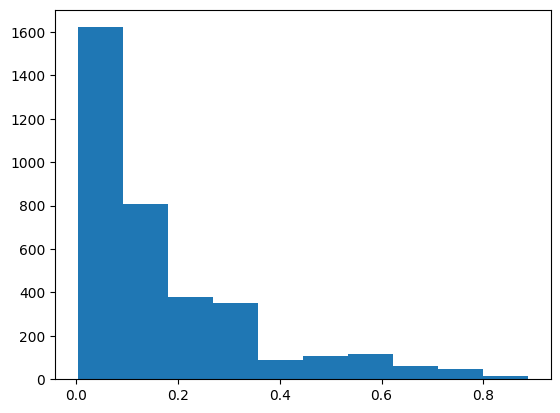

In [10]:
probas = model.predict_proba(X_test)[:,1]
plt.hist(probas)

### Can we decide a better CUTOFF value?

In [11]:
def draw_confusion_matrix(cm):

    print(
        f"             ACTUAL    \n         0         1\n    0    {cm[0][0]}     {cm[0][1]}\n    1     {cm[1][0]}     {cm[1][1]}"
    )

    print(
        f"Precision_0 -> Correctly classified with label 0: {cm[0][0]/(cm[0][0]+cm[1][1])}"
    )

    print(
        f"Precision_1 -> Correctly classified with label 1: {cm[1][1]/(cm[0][0]+cm[1][1])}"
    )

    print(
        f"Accuracy -> Overall percentage of correctly classified: {(cm[0][0]+cm[1][1])/sum(sum(cm))}"
    )

In [12]:
from sklearn.metrics import confusion_matrix

cutoffs = [.4,.5,.6,.7]
for cutoff in cutoffs:
    print(
        f"\nWith CUTOFF = {cutoff}:"
    )
    labels = (probas >= cutoff).astype(int)
    cm = confusion_matrix(y_test, labels)
    draw_confusion_matrix(cm)


With CUTOFF = 0.4:
             ACTUAL    
         0         1
    0    2780     249
    1     423     148
Precision_0 -> Correctly classified with label 0: 0.9494535519125683
Precision_1 -> Correctly classified with label 1: 0.050546448087431695
Accuracy -> Overall percentage of correctly classified: 0.8133333333333334

With CUTOFF = 0.5:
             ACTUAL    
         0         1
    0    2856     173
    1     454     117
Precision_0 -> Correctly classified with label 0: 0.9606458123107972
Precision_1 -> Correctly classified with label 1: 0.039354187689202826
Accuracy -> Overall percentage of correctly classified: 0.8258333333333333

With CUTOFF = 0.6:
             ACTUAL    
         0         1
    0    2915     114
    1     543     28
Precision_0 -> Correctly classified with label 0: 0.9904858987427795
Precision_1 -> Correctly classified with label 1: 0.009514101257220523
Accuracy -> Overall percentage of correctly classified: 0.8175

With CUTOFF = 0.7:
             ACTUAL  

- Overall, we correctly classified 82% of ALL observations.
- If ALL features were significant:
### **Would be due to the fact that with 12,000 employees in the dataset, we have a lot of observations. And something that statisticians know very well is that, as the number of observations increases, the effects all tend to be significant. As a matter of fact, when you're dealing with very "big data", say millions of observations, statistical significance usually becomes meaningless. Because even for effects that have in practice no impact, a regression will probably find it significant statistically.**

Anyway, since all effects are signifacnt, let's focus on how important they are and their effects.

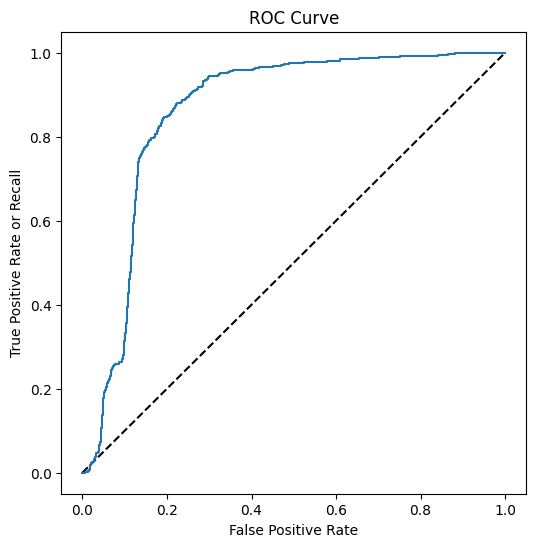

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probas)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate or Recall')
plt.title('ROC Curve')
plt.show()

- We can use absolute value of the z-value column to assess the importance of the variables. As with the t-value for the linear regression in the case of a logistic regression, the larger the z-value, the more important the effect is.
- Satisfaction > Time in company > # Projects and so on...

## Use a method, that does not rely on statistics to help the audience to understand the situation
## MODEL FREE APPROACH

### Plotting if employees left or not, as a function of the **TIME** spent in the company.
- Remember, since its a logistic approach. We would get both values in 0 and 1 along all times. But we will not know how many 0s or 1s there are, since they overlapp eachother.
- For that, we can aggregate the values, and compute the Mean Attrition Rate by years spent in the company.

#### The drivers are not directly comparable, some variables are zero or one, some are categories and some are continuous variables with different ranges.

Text(0, 0.5, 'Attrition')

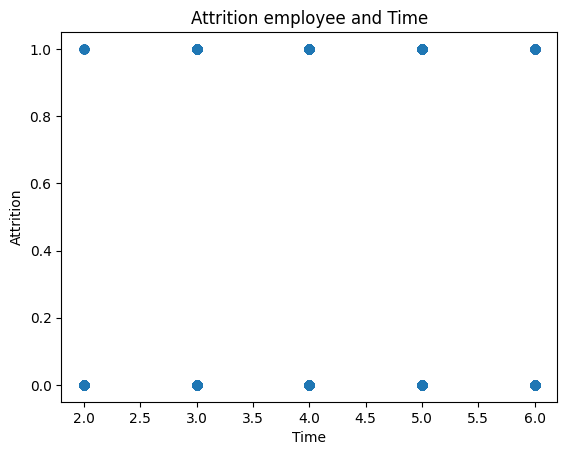

In [14]:
plt.scatter(df["Time"], df["Left"])
plt.title("Attrition employee and Time")
plt.xlabel("Time")
plt.ylabel("Attrition")

#### Since Attrition is Binary, we should find another way.
- Proportion of leavers by years spent in the company.

In [15]:
### Mean of Attrition per people spending only 1 year, 2 years, 3 years etc...
new_df = pd.DataFrame(df.groupby(df.Time)["Left"].mean())
new_df

,Left
Time,
2,0.010262
3,0.165727
4,0.240777
5,0.444240
6,0.212891


Text(0, 0.5, 'Attrition')

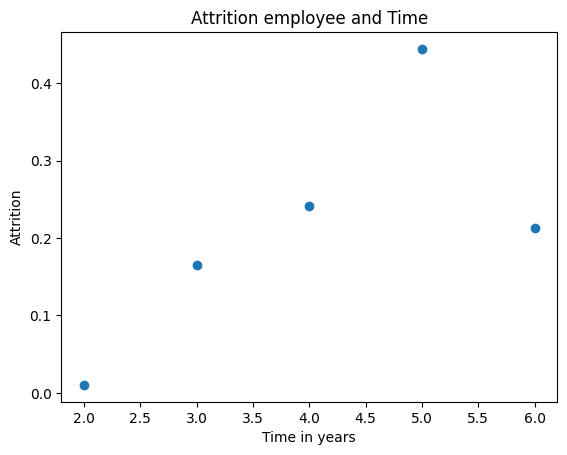

In [16]:
plt.scatter(new_df.index, new_df)
plt.title("Attrition employee and Time")
plt.xlabel("Time in years")
plt.ylabel("Attrition")

#### We see that attrition seems to be higher on the 5th year spent in the company. However, we can-'t see the amount of people who left.

In [17]:
new_df_count = pd.DataFrame(df.groupby(df["Time"])["Left"].count())
new_df_count.columns = ["People Left"]

<AxesSubplot: xlabel='Time', ylabel='Left'>

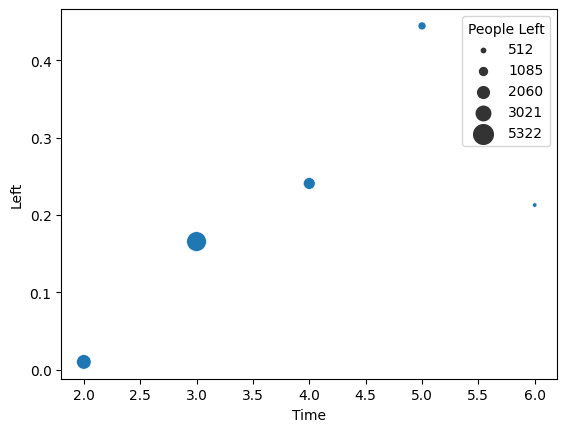

In [18]:
import seaborn as sns

last_df = pd.concat([new_df,new_df_count],axis=1)
sns.scatterplot(data=last_df, x=new_df.index, y="Left", size="People Left", legend=True, sizes=(10, 200))

- The attrition rate increases from year to year. On the 5th year, the employees are 44% likely to churn!

## Why?
- Salary not increases steep enough?
- Fail to prepare a carreer plan?
- Exogeneous?

- We see that in year 6, while the retention rate is still dangerously high it decreases a bit compared to year 5.
- What does that mean? Could it be that there is a non linear and non monotonous effect? Meaning that it starts increasing and then it decreases. Or could it be that it's just noise in the data? To assess it we can compute the number of observations related to each dot.
- And we could for instance make the same plot as before but with the size of the bubble proportionate to the number of employees in that case. We then obtain this plot and we see that the bigger group is actually the three year old employees and that the small group is indeed the 6 year old employees. On the other hand, if you compute the exact number you can see that this group has 512 observations.
- Even though it is the smaller one, we cannot really say that it should be disregarded. It may actually be an interesting case of self selection, those who stay even after passing threshold of 5 years are those who will stay even longer.

### Plotting if employees left or not "Attrition Rate", as a function of the **SATISFACTION**.
- Satisfaction is an index and can take any value from 0 to 1. Not like TIME which had only 5 values.
- What we can do, is CREATE COHORTS of Satisfaction.
- - Not satisfied at all.
- - It's Ok.
- - Not satisfied enough.
- - Very satisfied.


In [19]:
### Satisfaction vs Left

# Let's divide the Satisfaction into BINS
df_ = df.copy()
df_["Satisfaction_Bin"] = pd.qcut(df['Satisfaction'],q=np.linspace(df["Satisfaction"].min(),df["Satisfaction"].max(),20).tolist(), labels=np.arange(20,1,-1).tolist())

attrition_satisfaction_mean = pd.DataFrame(df_.groupby(df_.Satisfaction_Bin)["Left"].mean())

attrition_satisfaction_count = pd.DataFrame(df_.groupby(df_.Satisfaction_Bin)["Left"].count())


Text(13, 0.25, 'OKAY')

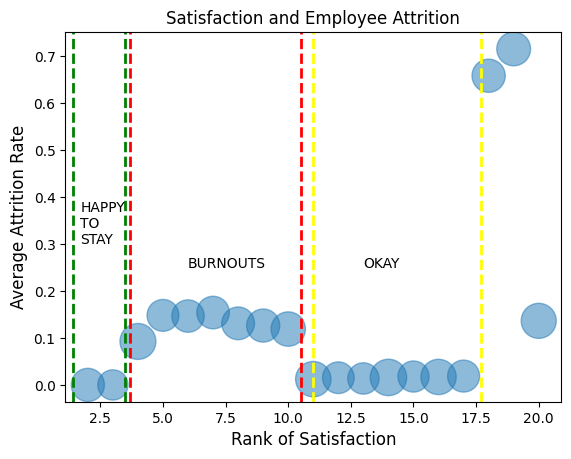

In [20]:
import seaborn as sns

attrition_satisfaction_count.columns = ["People Left"]
last_df = pd.concat([attrition_satisfaction_mean,attrition_satisfaction_count],axis=1)

plt.scatter(attrition_satisfaction_mean.index.categories, "Left", 
             s="People Left",
             alpha=0.5, 
             data=last_df)
plt.xlabel("Rank of Satisfaction", size=12)
plt.ylabel("Average Attrition Rate", size=12)
plt.title("Satisfaction and Employee Attrition", size=12)

# HAPPY
plt.axvline(x=1.4, color = 'green', linestyle='dashed', linewidth = 2)
plt.axvline(x=3.5, color = 'green', linestyle='dashed', linewidth = 2)
plt.text(1.7, 0.3, "HAPPY\nTO\nSTAY")


# BURNOUTS
plt.axvline(x=10.5, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=3.7, color = 'red', linestyle='dashed', linewidth = 2)
plt.text(6, 0.25, "BURNOUTS")

# OK
plt.axvline(x=11, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=17.7, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.text(13, 0.25, "OKAY")

# sns.scatterplot(data=last_df, x=attrition_satisfaction_mean.index.categories, y="Left", size="People Left", legend=True, sizes=(2, 200))

#### Here we can see NON-MONOTONOUS effects.
The employees that are satisfied but still not enough seem to present a higher risk of leaving than other employees that are more or less satisfied. It's probably those employees we've discussed during the second module on "finding goals within data". Good performers, but either they worked too hard and were burned out or they were probably recruited directly by the client. In the case of the burned out, they were not as happy as they could have been so they left.
And in the case of the high performers, their level of satisfaction was not high enough to retain them from leaving. In any case those are probably the guys we should do something about.
- Finally we have the very unsatisfied employees. As expected, those guys report a very high level of attrition 

## Actually, since we observe highly non-linear effects a more advanced models, such as decision tree or ensemble methods, would probably perform a lot better than a simple logistic regression.

#### By positive, I mean it in the business sense. It has a positive impact on the retention of the employee.

- Which reports nicely the relationship between the dependent variable, and the balance.
- People will always will understand easier, a plot like this than a story about p-values and t-tests.

- Achtung!
- The relationship between your evaluations and staying at the company, for instance, may go two ways.
- The company may decide to fire an employee if she has poor evaluations.
- But if another employee decided to leave already, and that she's looking for the job, it may impact her performance. And there may be a delayed effect where the cause is the anticipated departure, leading to a decline in motivation, and the final consequence is a poor evaluation.
- Loop of causality -> Causes -> Endogeneity.
- Endogeneity -> Brings your effects being estimated inaccurately. So be careful when interpreting the effects you estimate. And see your results as clues, leading you to your destination, but not as decisive facts